In [41]:
using OptimalControl
using NLPModelsIpopt
using Plots
using LaTeXStrings

In [4]:
# Constantes
tf = 5
m = 0.1
m_t = 1.1
largo = 0.5
g = 9.81


9.81

In [20]:
function F(x, parametros)
    """
    Función de estado del sistema del péndulo invertido.
    x: vector de estado [x1, x2, x3, x4]
    parametros: lista de parámetros del sistema [m, mt, l, g]
    """
    m, m_t, largo, g = parametros

    # Variables de estado
    x1, x2, x3, x4 = x
    # Ecuaciones de movimiento
    dx1 = x2
    dx2 = (4/3 * m * largo * x4^2 * sin(x3) - m * g * sin(2 * x3) / 2) / (4/3 * m_t - m * cos(x3)^2)
    dx3 = x4
    dx4 = (m_t * g * sin(x3) - m * largo * x4^2 * sin(2 * x3) / 2) / (largo * (4/3 * m_t - m * cos(x3)^2))

    return [dx1, dx2, dx3, dx4]
end

function G(x, parametros)
    """
    Función de control del sistema del péndulo invertido.
    x: vector de estado [x1, x2, x3, x4]
    parametros: lista de parámetros del sistema [m, mt, l, g]
    """
    m, m_t, largo, g = parametros

    # Variables de estado
    x3 = x[3]
    # Función de control
    g1 = 0
    g2 = 4/3 * (1 / (4/3 * m_t - m * cos(x3)^2))
    g3 = 0
    g4 = -cos(x3) / (largo * (4/3 * m_t - m * cos(x3)^2))

    return [g1, g2, g3, g4]
end

G (generic function with 1 method)

In [55]:
function dot_compatible(x, y)
    return sum(x .* y)
end

# Define the dynamics

# x0, v0, theta0, w0
valores_iniciales = [0.01, 0.02, -0.01, 0]

@def ocp begin 
    t ∈ [0, tf], time
    x ∈ R^4, state
    u ∈ R, control
    x(0) == valores_iniciales
    ∂(x)(t) == F(x(t), [m, m_t, largo, g]) + G(x(t), [m, m_t, largo, g])* u(t)
    ∫(dot_compatible(x(t), x(t)) * (t >= 4.75 && t <= 5)) → min
end

The (non autonomous) optimal control problem is given by:

    t ∈ [0, tf], time
    x ∈ R ^ 4, state
    u ∈ R, control
    x(0) == valores_iniciales
    (∂(x))(t) == F(x(t), [m, m_t, largo, g]) + G(x(t), [m, m_t, largo, g]) * u(t)
    ∫(dot_compatible(x(t), x(t)) * (t >= 4.75 && t <= 5)) → min

The (non autonomous) optimal control problem is of the form:

    minimize  J(x, u) = ∫ f⁰(t, x(t), u(t)) dt, over [0, 5]

    subject to

        ẋ(t) = f(t, x(t), u(t)), t in [0, 5] a.e.,

        ϕl ≤ ϕ(x(0), x(5)) ≤ ϕu, 

    where x(t) ∈ R⁴ and u(t) ∈ R.

Declarations (* required):
╭────────┬────────┬──────────┬──────────┬───────────┬────────────┬─────────────╮
│ times* │ state* │ control* │ variable │ dynamics* │ objective* │ constraints │
├────────┼────────┼──────────┼──────────┼───────────┼────────────┼─────────────┤
│   V    │   V    │    V     │    X     │     V     │     V      │      V      │
╰────────┴────────┴──────────┴──────────┴───────────┴────────────┴─────────────╯


In [50]:
sol = solve(ocp)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     9005
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1506

Total number of variables............................:     1506
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1255
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 1.10e-01 5.34e-03   0.0 0.00e+00    -  0.00e+00 0.00e+00 

OptimalControlSolution

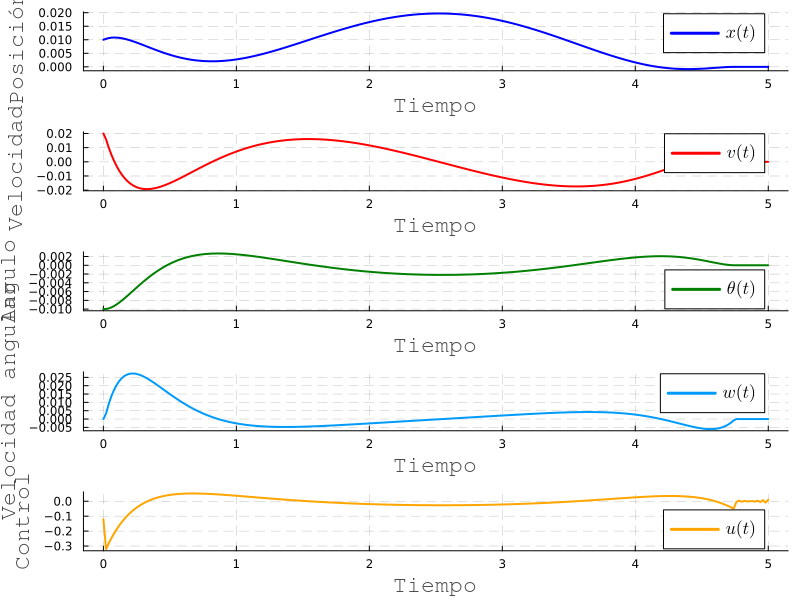

"/Users/tomy/VSCode/ControlOptimo/SVM_CO/pendulo_invertido/pendulo_invertido_OC.pdf"

In [56]:
t = sol.times
# x0, v0, theta0, w0
x = [x[1] for x in sol.state.(sol.times)]
v = [x[2] for x in sol.state.(sol.times)]
theta = [x[3] for x in sol.state.(sol.times)]
w = [x[4] for x in sol.state.(sol.times)]


# Primer gráfico: trayectorias de los estados
plot1 = plot(
    t, 
    x, 
    label=L"x(t)", 
    lw=2, 
    color=:blue,
    xlabel="Tiempo", 
    ylabel="Posición ", 
    xguidefont=font("CMU Serif", 12), 
    yguidefont=font("CMU Serif", 12), 
    titlefont=font("CMU Serif", 15),
    grid=:on, 
    gridstyle=:dash, 
    gridcolor=:gray, 
    gridalpha=0.5,
    legendfontsize=12,
)

plot2 = plot(
    t, 
    v, 
    label=L"v(t)", 
    lw=2, 
    color=:red,
    xlabel="Tiempo", 
    ylabel="Velocidad ", 
    xguidefont=font("CMU Serif", 12), 
    yguidefont=font("CMU Serif", 12), 
    titlefont=font("CMU Serif", 15),
    grid=:on, 
    gridstyle=:dash, 
    gridcolor=:gray, 
    gridalpha=0.5,
    legendfontsize=12
)

plot3 = plot(
    t, 
    theta, 
    label=L"\theta(t)", 
    lw=2, 
    color=:green,
    xlabel="Tiempo", 
    ylabel="Angulo", 
    xguidefont=font("CMU Serif", 12), 
    yguidefont=font("CMU Serif", 12), 
    titlefont=font("CMU Serif", 15),
    grid=:on, 
    gridstyle=:dash, 
    gridcolor=:gray, 
    gridalpha=0.5,
    legendfontsize=12
)

plot4 = plot(
    t, 
    w, 
    label=L"w(t)", 
    lw=2, 
    xlabel="Tiempo", 
    ylabel="Velocidad angular", 
    xguidefont=font("CMU Serif", 12), 
    yguidefont=font("CMU Serif", 12), 
    titlefont=font("CMU Serif", 15),
    grid=:on, 
    gridstyle=:dash, 
    gridcolor=:gray, 
    gridalpha=0.5,
    legendfontsize=12
)

plot5 = plot(
    t, 
    sol.control.(sol.times),
    label=L"u(t)", 
    lw=2, 
    color=:orange,
    xlabel="Tiempo", 
    ylabel="Control", 
    xguidefont=font("CMU Serif", 12), 
    yguidefont=font("CMU Serif", 12), 
    titlefont=font("CMU Serif", 15),
    grid=:on, 
    gridstyle=:dash, 
    gridcolor=:gray, 
    gridalpha=0.5,
    legendfontsize=12
)

# Combinar ambos gráficos en un layout vertical
plot_combined = plot(
    plot1, 
    plot2, 
    plot3, 
    plot4,
    plot5,
    layout=(5, 1),             
    size=(800, 600),         
)

# Mostrar el gráfico
display(plot_combined)

# Guardar como PDF o imagen (opcional)
savefig("pendulo_invertido_OC.pdf")


In [54]:
sol.objective


-3.274391749636931e-11